In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


In [38]:
df = pd.read_csv('SleepDebtPredictor - Sheet1.csv')
df

,eye_redness,dark_circles,yawn_count,sleep_debt
0,1,4,0,2
1,1,3,0,1
2,1,3,2,3
3,1,2,0,0
4,1,6,0,4
...,...,...,...,...
95,0,0,1,0
96,2,7,1,5
97,0,1,1,0
98,3,8,1,7


In [39]:
df.isnull().sum()

eye_redness     0
dark_circles    0
yawn_count      0
sleep_debt      0
dtype: int64

In [40]:
df.corr()

,eye_redness,dark_circles,yawn_count,sleep_debt
eye_redness,1.000000,0.099364,0.131052,0.512670
dark_circles,0.099364,1.000000,-0.020056,0.653199
yawn_count,0.131052,-0.020056,1.000000,0.528249
sleep_debt,0.512670,0.653199,0.528249,1.000000


In [41]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [42]:
X

,eye_redness,dark_circles,yawn_count
0,1,4,0
1,1,3,0
2,1,3,2
3,1,2,0
4,1,6,0
...,...,...,...
95,0,0,1
96,2,7,1
97,0,1,1
98,3,8,1


In [43]:
y

0     2
1     1
2     3
3     0
4     4
     ..
95    0
96    5
97    0
98    7
99    3
Name: sleep_debt, Length: 100, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

with open("models/scaler.pkl",'wb') as file:
    pickle.dump(scaler,file)

In [46]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression(n_jobs = -1)
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [47]:
y_pred = regression.predict(X_test)


In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
R2_Score = r2_score(y_test,y_pred)

print(f"MSE : {mse}")
print(f"MAE : {mae}")
print(f"RMSE : {rmse}")
print(f"R2 Score : {R2_Score}")

MSE : 1.0507506715320032
MAE : 0.7993031942686843
RMSE : 1.0250613013532426
R2 Score : 0.8693356208301827


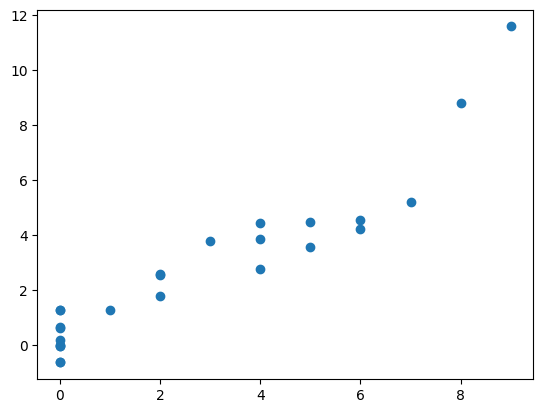

In [49]:
plt.scatter(y_test,y_pred)

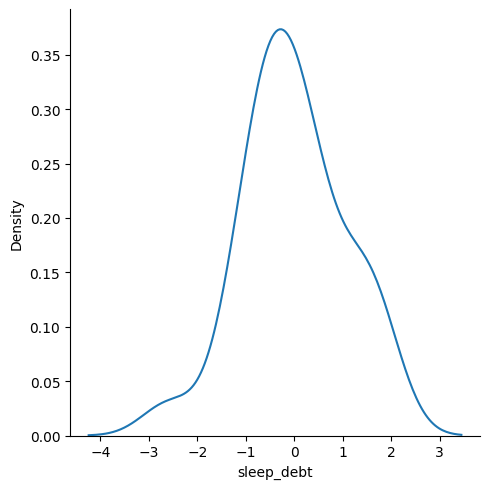

In [50]:
residuals = y_test-y_pred
sns.displot(residuals,kind = 'kde')

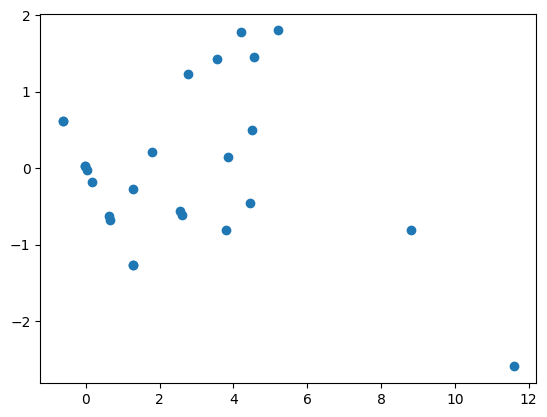

In [51]:
plt.scatter(y_pred,residuals)

In [52]:
with open("models/regression.pkl",'wb') as file:
    pickle.dump(regression,file)